In [12]:
# Used for manipulation of directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Used to import csv files
import pandas as pd

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [13]:
### Loading the data

In [14]:
df = pd.read_csv('FuelConsumption.csv', usecols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'])
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244


In [15]:
yCoords = np.stack(df['CO2EMISSIONS'])
numFeatures = 5

xCoords = np.stack((np.ones(yCoords.size), df['ENGINESIZE'], df['CYLINDERS'], df['FUELCONSUMPTION_CITY'], df['FUELCONSUMPTION_COMB']), axis = 1)
print('Feature Values:\n', xCoords, '\n')
print('CO 2 Emission Values:\n', yCoords)

Feature Values:
 [[ 1.   2.   4.   9.9  8.5]
 [ 1.   2.4  4.  11.2  9.6]
 [ 1.   1.5  4.   6.   5.9]
 ...
 [ 1.   3.   6.  13.4 11.8]
 [ 1.   3.2  6.  12.9 11.3]
 [ 1.   3.2  6.  14.9 12.8]] 

CO 2 Emission Values:
 [196 221 136 ... 271 260 294]


In [16]:
def costFunction(xCoords, yCoords, theta):
    ''' Will return the amount of error '''
    
    # Taking the dot product of the theta values and the x coordinates to find the equation of each line
    predictions = np.dot(xCoords, theta)
    
    # Defining an accumulator to retain the amount of error that is produced
    totalError = 0
    
    m = len(yCoords) # number of coordinates
     
    # Calculating the total error produced by the line
    totalError = 1/(2 * m) * np.sum(np.square(predictions - yCoords))
       
    return totalError

In [17]:
def gradientDescent(xCoords, yCoords, theta, epoch):
    ''' Will find the line of best fit '''
    
    errors = []
    
    m = yCoords.size
    
    predictions = np.dot(xCoords, theta)
    
    # Learning Rate
    a = 0.0001
    
    # Epoch
    for e in range(epoch):
        
        # Updating our theta values
        theta = theta - a / m * (predictions - yCoords).dot(xCoords)

        predictions = np.dot(xCoords, theta)
        
        # We save the error that our line produced on each iteration of e
        errors.append(costFunction(xCoords, yCoords, theta))
        
    return theta, errors

In [18]:
# Initializing our theta values to 1's
theta = [0 for i in range(numFeatures)]

epoch = 100

theta, errors = gradientDescent(xCoords, yCoords, theta, epoch)
print("Our approximate theta values are:\n", theta)
print('\n', errors)

Our approximate theta values are:
 [0.685911   2.38680001 4.09413339 9.14660708 7.95891783]

 [32214.10643237871, 29795.239665103167, 27560.874744828165, 25496.938422655086, 23590.430915048364, 21829.34402310602, 20202.58549744749, 18699.909172321775, 17311.85042887699, 16029.666581098836, 14845.28180893146, 13751.236291735342, 12740.63922169292, 11807.125401211235, 10944.815150944962, 10148.277275915621, 9412.494856464526, 8732.833648569589, 8105.012894491531, 7525.078359896735, 6989.377427627793, 6494.536091246797, 6037.437703442374, 5615.203345444728, 5225.173693803009, 4864.892270310736, 4532.089969576823, 4224.670766787242, 3940.698515635931, 3678.384753270049, 3436.077435437567, 3212.250530884138, 3005.4944094582625, 2814.5069633830676, 2638.0854057709466, 2475.1186947229685, 2324.5805352953635, 2185.5229152550733, 2057.070133908555, 1938.4132863936757, 1828.8051686933334, 1727.5555712794132, 1634.026931743516, 1547.6303190320182, 1467.8217239916842, 1394.0986328613692, 1325.9968

Text(0, 0.5, 'Cost')

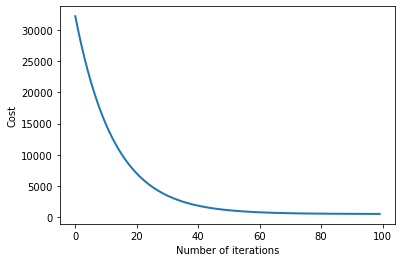

In [19]:
# Plotting the error
#fig = plt.figure()  # open a new figure
plt.plot(np.arange(len(errors)), errors, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')